## Задание 1

In [23]:
from PIL import Image, ImageDraw # Для удобства работы с растровыми изображениями будем использовать библиотеку Pillow 

image = Image.open('plane.png')  # Открываем изображение
draw = ImageDraw.Draw(image)  # Создаем инструмент рисования
width = image.size[0]  # Определяем ширину
height = image.size[1]  # Определяем высоту
pix = image.load() # Получаем объект PixelAccess для взаимодействия с пикселями 

In [21]:
def get_y(r,g,b):
    return int(0.299 * r  + 0.587 * g + 0.114 * b) # Преобразуем по данной формуле и округляем до целого

In [25]:
values = list() # В этом списке будем хранить яркость каждого пикселя для дальнейшего анализа
for x in range(width):
    for y in range(height):
        r, g, b = pix[x, y] # Получаем значение для каждого цвета
        y_i = get_y(r,g,b) # Получаем яркость пикселя для преобразования
        draw.point((x, y), (y_i, y_i, y_i)) # Записываем полученную величину
        values.append(y_i)

# Сохраним полученное изображение и проверим
image.save("plane_gray.png", "PNG")
image.show()

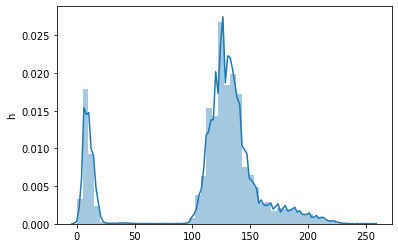

In [28]:
import seaborn as sns
import matplotlib.pyplot as plt

# Наконец, построим гистограмму
plt.figure()
plt.ylabel('h')
sns.distplot(values)

Как видно из гистограммы, необходимая область однородности находится на промежутке от 0 до 50-ти.

In [37]:
image = Image.open('plane.png')
draw = ImageDraw.Draw(image)
pix = image.load()

lines = ['R,G,B,label\n'] # В этом списке будем хранить строки итогового csv-файла
red = (255, 0, 0) # Цвет заливки
for x in range(width):
    for y in range(height):
        r, g, b = pix[x, y]
        y_i = get_y(r,g,b)
        
        if y_i < 50:
            label = '1\n'
            draw.point((x, y), red)
        else:
            label = '2\n'
        lines.append(','.join([str(r),str(g),str(b),label]))

image.save("plane_colored.png", "PNG")
with open('colors.csv', 'w') as f:
    f.writelines(lines)